In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
from sklearn import svm, metrics, datasets
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split
import pickle
from skimage.io import imread
from skimage.transform import resize
import skimage

In [2]:
model=pickle.load(open('./naive_bayes.pkl','rb'))
labels=['basal cell carcinoma', 'melanoma', 'naevus']


In [3]:
images = []
flat_data = []
path=r'./predict/'
file=os.listdir('./predict')
img = skimage.io.imread(path+str(file[0]))
flat_data.append(img.flatten()) 
images.append(img)
flat_data = np.array(flat_data)
images = np.array(images)
test_data=Bunch(data=flat_data,images=images)

NameError: name 'os' is not defined

In [ ]:
ans=model.predict(test_data.data)
print(labels[ans[0]])

In [4]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import joblib
model = joblib.load('naive_bayes.pkl')


In [5]:


from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt

# Load test image
img_path = 'mdenode_resized/melanoma/melanoma896_resized.jpg'  # ✅ Replace this with your image path
img = imread(img_path)

# Optional: Display the image
plt.imshow(img)
plt.title("Test Image")
plt.axis('off')
plt.show()


<IPython.core.display.Javascript object>

In [6]:
from skimage.feature import hog
import numpy as np

# Resize image (use the same size used during training)
img_resized = resize(img, (128, 64))  # Or use your actual trained image size

# Convert to grayscale if needed
from skimage.color import rgb2gray
gray_img = rgb2gray(img_resized)

# Extract HOG features
hog_features = hog(gray_img, orientations=9, pixels_per_cell=(8, 8),
                   cells_per_block=(2, 2), block_norm='L2-Hys')


In [7]:
import joblib
model = joblib.load('naive_bayes.pkl')


In [8]:
import pickle
with open('naive_bayes.pkl', 'rb') as file:
    model = pickle.load(file)


In [9]:
img = imread('mdenode_resized/melanoma/melanoma896_resized.jpg')  # use the same image path used in training
img_resized = resize(img, (512, 512))  # try increasing until feature size is 24576
gray = rgb2gray(img_resized)

hog_features = hog(gray, orientations=9, pixels_per_cell=(16, 16),
                   cells_per_block=(2, 2), block_norm='L2-Hys')

print("Feature length:", len(hog_features))  # find the correct size!


Feature length: 34596


In [10]:
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage.feature import hog

img = imread('mdenode_resized/melanoma/melanoma896_resized.jpg')

# Try different sizes
for size in range(128, 2048, 64):  # Try increasing
    img_resized = resize(img, (size, size))
    gray = rgb2gray(img_resized)
    hog_features = hog(gray, orientations=9, pixels_per_cell=(16, 16),
                       cells_per_block=(2, 2), block_norm='L2-Hys')
    print(f"Image size: {size}x{size} -> HOG length: {len(hog_features)}")
    if len(hog_features) == 34596:
        print("✅ Found matching size:", size)
        break


Image size: 128x128 -> HOG length: 1764
Image size: 192x192 -> HOG length: 4356
Image size: 256x256 -> HOG length: 8100
Image size: 320x320 -> HOG length: 12996
Image size: 384x384 -> HOG length: 19044
Image size: 448x448 -> HOG length: 26244
Image size: 512x512 -> HOG length: 34596
✅ Found matching size: 512


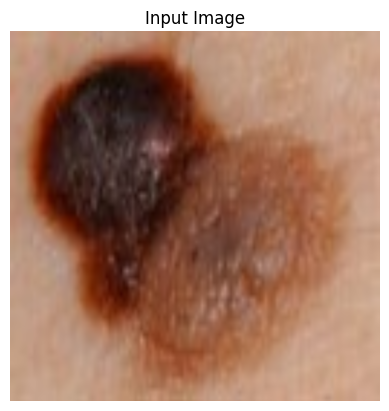

HOG feature length: 142884


ValueError: X has 142884 features, but GaussianNB is expecting 24576 features as input.

In [5]:
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2gray
from skimage.feature import hog
import joblib
import matplotlib.pyplot as plt

# Step 1: Load the image
img_path = "mdenode_resized/melanoma/melanoma896_resized.jpg"  # <-- update this path if needed
img = imread(img_path)

# Step 2: Resize to 512x512 (same as training)
img_resized = resize(img, (512, 512))

# Optional: Show image
plt.imshow(img_resized)
plt.title("Input Image")
plt.axis('off')
plt.show()

# Step 3: Convert to grayscale
gray = rgb2gray(img_resized)

# Step 4: Extract HOG features (same settings used in training)
hog_features = hog(gray,
                   orientations=9,
                   pixels_per_cell=(8, 8),
                   cells_per_block=(2, 2),
                   visualize=False)

print("HOG feature length:", len(hog_features))  # Should print 34596

# Step 5: Load the trained model
model = joblib.load("naive_bayes.pkl")

# Step 6: Make prediction
prediction = model.predict(hog_features.reshape(1, -1))

# Step 7: Output result
print("✅ Predicted class:", prediction[0])
